Run the differential expression analysis

**Need to run first:**
- [`../0-prepare_data`](../0-prepare_data.ipynb)
- [`1-extract_samples`](1-extract_samples.ipynb)

**Table of content**
1. [Testing how the complexification of the model explain the data](#Testing-how-the-complexification-of-the-model-explain-the-data)
2. [Build the DESeqDataSetFromMatrix object](#Build-the-DESeqDataSetFromMatrix-object)
2. [Exploratory analysis and visualization](#Exploratory-analysis-and-visualization)
3. [Differential expression analysis](#Differential-expression-analysis)

*Generated from a Jupyter Notebook - [Sources](https://github.com/bebatut/neuromac_GF_mices/blob/master/src/sex-driven-aging/2-run_dge_analysis.ipynb)*

# Load
## Libraries and functions

In [1]:
source("../load_libraries.R")

Warning message:
“package ‘reshape2’ was built under R version 3.6.3”
Warning message:
“package ‘XML’ was built under R version 3.6.3”


Allowing multi-threading with up to 4 threads.


Warning message:
“package ‘reshape’ was built under R version 3.6.3”
Warning message:
“package ‘plotly’ was built under R version 3.6.3”
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘factoextra’ was built under R version 3.6.3”
Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...

preparing gene to GO mapping data...

preparing IC data...



In [2]:
source("../functions.R")

## Get the data

In [3]:
dp = "../../results/dge/sex-driven-aging/"

In [4]:
load(paste(dp, "metadata.RData", sep=''))
load(paste(dp, "prepared_counts.RData", sep=''))

# Testing how the complexification of the model explain the data

- Test of the addition of each factor and interactions
- Extraction of the number and percentage of genes with a significant p-values (< 0.05) for the Likelihood Ratio Tests

In [5]:
complexif_stats = tibble::data_frame(
    Design=character(),
    Reduced=character(),
    Tested=character(),
    Gene_nb=numeric(),
    Gene_perc=numeric())

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [6]:
# Design: project
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ project)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="project", Reduced="1", Tested="project", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 223 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [7]:
# Design: Sex
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex", Reduced="1", Tested="Sex", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 768 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [8]:
# Design: Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Age)
dge = DESeq(dds, test="LRT", reduced = ~ 1)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Age", Reduced="1", Tested="Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  onl

In [9]:
# Design: Sex + Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Age", Reduced="Sex", Tested="Age", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  onl

In [10]:
# Design: Age + Sex
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Age + Sex)
dge = DESeq(dds, test="LRT", reduced = ~ Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Age + Sex", Reduced="Age", Tested="Sex", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  onl

In [11]:
# Design: Sex + Age + Sex:Age
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Age + Sex:Age)
dge = DESeq(dds, test="LRT", reduced = ~ Sex + Age)
LRT_res = results(dge, alpha=0.05)
nb = get_sign_padj(LRT_res)
complexif_stats = complexif_stats %>%
    add_row(Design="Sex + Age + Sex:Age", Reduced="Sex + Age", Tested="Sex:Ag", Gene_nb=nb, Gene_perc=100*nb/dim(LRT_res)[1])

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  onl

Genes with a significant p-values (< 0.05) for the Likelihood Ratio Tests 

In [12]:
complexif_stats %>%
    rename('Genes with significant LRT adjusted p-value' = Gene_nb) %>%
    rename('% genes with significant LRT adjusted p-value' = Gene_perc)

Design,Reduced,Tested,Genes with significant LRT adjusted p-value,% genes with significant LRT adjusted p-value
<chr>,<chr>,<chr>,<dbl>,<dbl>
project,1,project,7174,38.795155
Sex,1,Sex,1642,8.879515
Age,1,Age,2439,13.189487
Sex + Age,Sex,Age,3044,16.461172
Age + Sex,Age,Sex,2385,12.897469
Sex + Age + Sex:Age,Sex + Age,Sex:Ag,1006,5.440190


Percentage of variables' effect on transcriptomic profile

In [13]:
complexif_stats %>%
    group_by(Tested) %>%
    select(c(Tested, Gene_perc)) %>%
    summarise_all(funs(min(.),max(.)))

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Tested,min,max
<chr>,<dbl>,<dbl>
Age,13.189487,16.46117
Sex,8.879515,12.89747
Sex:Ag,5.440190,5.44019
project,38.795155,38.79515


Factor | Percentage of genes with LRT adjusted p-value < 0.05
--- | ---
Age | 13.19% - 16.46%
Sex | 8.88% - 12.9%
Sex:Age | 5.44%

# Build the DESeqDataSetFromMatrix object

Construct DESeqDataSet and organize levels of the factors (8w being the reference)

In [14]:
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ Sex + Age + Sex:Age)
dds$Age = relevel(dds$Age, ref="Young")
dds$Sex = relevel(dds$Sex, ref="Female")

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]



# Exploratory analysis and visualization

We use here the variance stabilizing transformation 

In [15]:
vsd = vst(dds, blind = FALSE)

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]



Distances between the samples

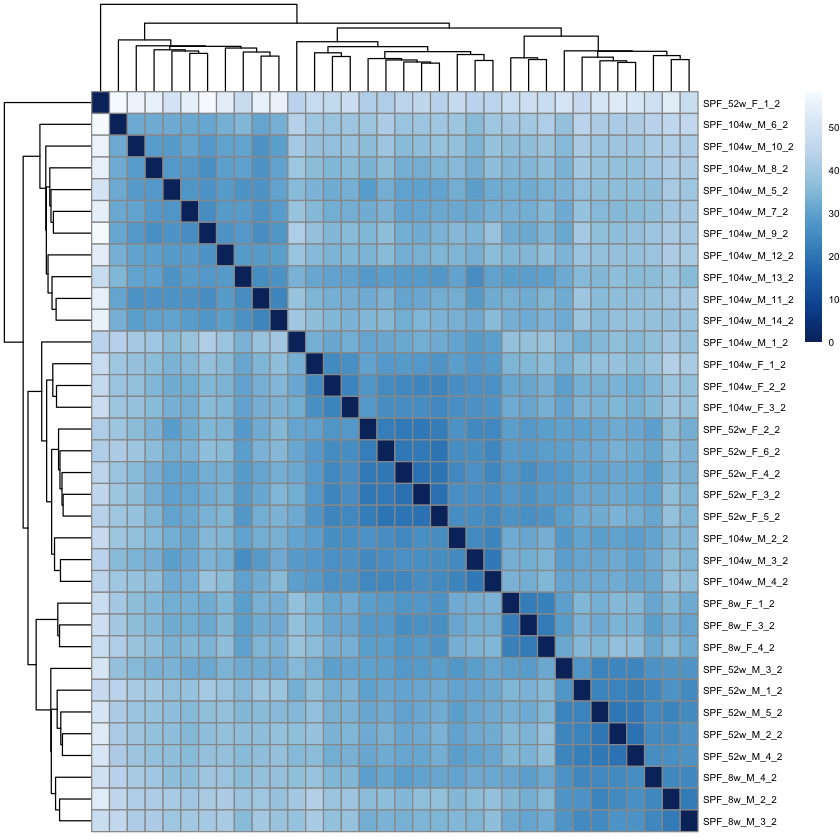

In [16]:
sampleDists = dist(t(assay(vsd)))
sampleDistMatrix = as.matrix( sampleDists )
colnames(sampleDistMatrix) = NULL
colors = colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         fontsize = 6)

PCA plot 

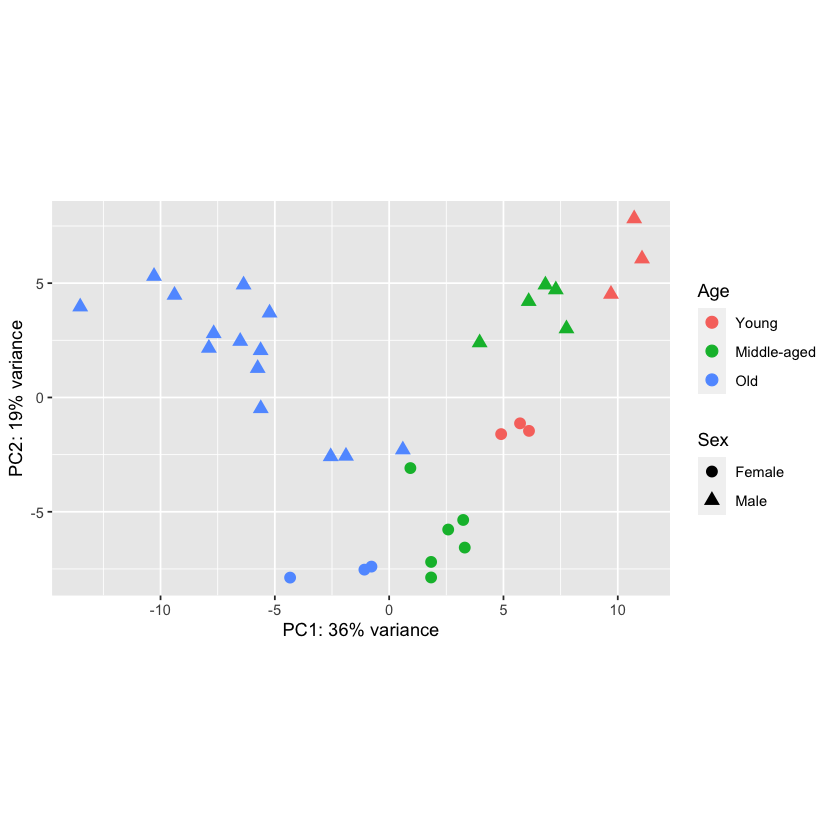

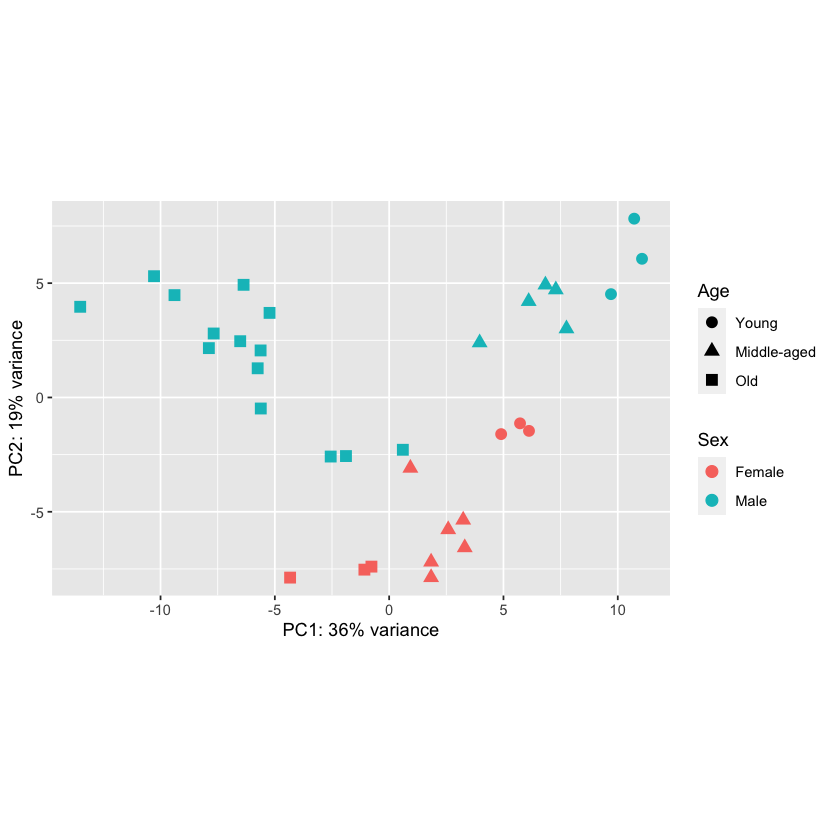

In [17]:
pcaData = plotPCA(vsd, intgroup = c("Sex", "Age"), returnData = TRUE)
percentVar = round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(x = PC1, y = PC2, color = Age, shape = Sex)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()
ggplot(pcaData, aes(x = PC1, y = PC2, color = Sex, shape = Age)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()

Batch effect

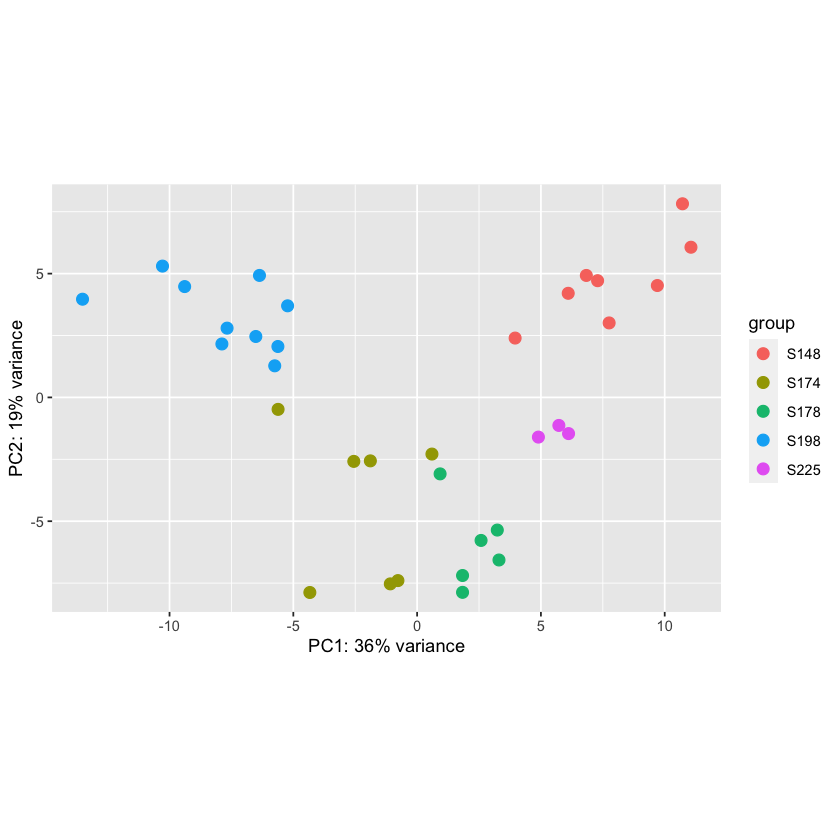

In [18]:
plotPCA(vsd, intgroup = "project")

# Differential expression analysis

In [19]:
dge = DESeq(dds)
save(dge, file = paste(dp, "dge.RData", sep=''))

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]

final dispersion estimates

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a

Extract and save the normalized counts

In [20]:
norm_counts = counts(dge, normalized = TRUE)
save(norm_counts, file=paste(dp, "norm_counts.RData", sep=''))
write.table(norm_counts, paste(dp, "norm_counts", sep=''), sep = "\t", quote = FALSE)

Extract and save the Z-scores

In [21]:
mean_counts = apply(norm_counts, 1, mean)
sd_counts = apply(norm_counts, 1, sd)
z_scores = (norm_counts - mean_counts)/sd_counts
save(z_scores, file=paste(dp, "z_scores.RData", sep=''))
write.table(z_scores, paste(dp, "z_scores", sep=''), sep = "\t", quote = FALSE)

Extract some statistics about the Z-scores
1. Full dimension of Z-scores matrix
2. Z-score higher than 3.5 or smaller than -3.5
3. Percentage of Z-score higher than 3.5 or smaller than -3.5

In [22]:
dim(z_scores)
# z_score higher than 3.5 or smaller than -3.5
s = data.frame("z_scores > 3.5" = apply(z_scores > 3.5, 2, sum, na.rm = T), "z_scores < -3.5" = apply(z_scores < -3.5, 2, sum, na.rm = T))
t(s)
s_perc = 100 * s/dim(norm_counts)[1]
t(s_perc)
data.frame(number = apply(s,2,sum),
           minimum_percentage = apply(s_perc,2,min),
           maximum_percentage = apply(s_perc,2,max),
           row.names = c("z_scores > 3.5", "z_scores < -3.5"))

[1] 18492    34

,SPF_104w_F_1_2,SPF_104w_F_2_2,SPF_104w_F_3_2,SPF_104w_M_1_2,SPF_104w_M_10_2,SPF_104w_M_11_2,SPF_104w_M_12_2,SPF_104w_M_13_2,SPF_104w_M_14_2,SPF_104w_M_2_2,⋯,SPF_52w_M_2_2,SPF_52w_M_3_2,SPF_52w_M_4_2,SPF_52w_M_5_2,SPF_8w_F_1_2,SPF_8w_F_3_2,SPF_8w_F_4_2,SPF_8w_M_2_2,SPF_8w_M_3_2,SPF_8w_M_4_2
z_scores...3.5,170,144,146,278,223,105,134,82,116,123,⋯,221,119,249,193,108,93,140,314,291,121
z_scores....3.5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,SPF_104w_F_1_2,SPF_104w_F_2_2,SPF_104w_F_3_2,SPF_104w_M_1_2,SPF_104w_M_10_2,SPF_104w_M_11_2,SPF_104w_M_12_2,SPF_104w_M_13_2,SPF_104w_M_14_2,SPF_104w_M_2_2,⋯,SPF_52w_M_2_2,SPF_52w_M_3_2,SPF_52w_M_4_2,SPF_52w_M_5_2,SPF_8w_F_1_2,SPF_8w_F_3_2,SPF_8w_F_4_2,SPF_8w_M_2_2,SPF_8w_M_3_2,SPF_8w_M_4_2
z_scores...3.5,0.9193165,0.7787151,0.7895306,1.503353,1.205927,0.5678131,0.7246377,0.443435,0.6272983,0.6651525,⋯,1.195111,0.6435215,1.346528,1.043695,0.5840363,0.5029202,0.7570841,1.698032,1.573653,0.654337
z_scores....3.5,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,⋯,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000


,number,minimum_percentage,maximum_percentage
,<int>,<dbl>,<dbl>
z_scores > 3.5,6548,0.4163963,4.2396712
z_scores < -3.5,38,0.0000000,0.2054943


Contrasts (factors)

In [23]:
contrast_names = resultsNames(dge)
contrast_names = gsub("Middle.aged", "Middle-aged", contrast_names)
contrast_names = gsub("^(Sex|Age)_", "", contrast_names)
contrast_names = gsub("\\.(Sex|Age)", " & ", contrast_names)
contrast_names = gsub("(Sex|Age)", "", contrast_names)
contrast_names = gsub("_", " ", contrast_names)
contrast_names

[1] "Intercept"            "Male vs Female"       "Middle-aged vs Young"
[4] "Old vs Young"         "Male & Middle-aged"   "Male & Old"

In [24]:
contrasts = as.data.frame(matrix(
        nrow=0,
        ncol=length(contrast_names)+1)) %>%
    rbind(c("Male vs Female (Young)", 0, 1, rep(0, 4))) %>%
    rename_all(funs(c("Info", contrast_names))) %>%
    rbind(c("Male vs Female (Middle-aged)", 0, 1, rep(0, 2), 1, 0)) %>%
    rbind(c("Male vs Female (Old)", 0, 1, rep(0, 3), 1)) %>%
    rbind(c("Male vs Female", 0, 1, rep(0, 2), 1/3, 1/3)) %>%
    rbind(c("Middle-aged vs Young (Female)", rep(0, 2), 1, rep(0, 3))) %>%
    rbind(c("Middle-aged vs Young (Male)", rep(0, 2), 1, 0, 1, 0)) %>%
    rbind(c("Middle-aged vs Young", rep(0, 2), 1, 0, 1/2, 0, 1/2, 0)) %>%
    rbind(c("Old vs Young (Female)", rep(0, 3), 1, rep(0, 2))) %>%
    rbind(c("Old vs Young (Male)", rep(0, 3), 1, 0, 1)) %>%
    rbind(c("Old vs Young", rep(0, 3), 1, 0, 1/2)) %>%
    rbind(c("Old vs Middle-aged (Female)", rep(0, 2), -1, 1, rep(0, 2))) %>%
    rbind(c("Old vs Middle-aged (Male)", rep(0, 2), -1, 1, -1, 1)) %>%
    rbind(c("Old vs Middle-aged", rep(0, 2), -1, 1, -1/2, 1/2))
contrasts
save(contrasts, file=paste(dp, "contrasts.RData", sep=''))

Info,Intercept,Male vs Female,Middle-aged vs Young,Old vs Young,Male & Middle-aged,Male & Old
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Male vs Female (Young),0,1,0,0,0,0
Male vs Female (Middle-aged),0,1,0,0,1,0
Male vs Female (Old),0,1,0,0,0,1
Male vs Female,0,1,0,0,0.333333333333333,0.333333333333333
Middle-aged vs Young (Female),0,0,1,0,0,0
Middle-aged vs Young (Male),0,0,1,0,1,0
Middle-aged vs Young,0,0,1,0,0.5,0
Old vs Young (Female),0,0,0,1,0,0
Old vs Young (Male),0,0,0,1,0,1


# Citations

In [25]:
citation("DESeq2")


  Love, M.I., Huber, W., Anders, S. Moderated estimation of fold change
  and dispersion for RNA-seq data with DESeq2 Genome Biology 15(12):550
  (2014)

A BibTeX entry for LaTeX users is

  @Article{,
    title = {Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2},
    author = {Michael I. Love and Wolfgang Huber and Simon Anders},
    year = {2014},
    journal = {Genome Biology},
    doi = {10.1186/s13059-014-0550-8},
    volume = {15},
    issue = {12},
    pages = {550},
  }
